<a href="https://colab.research.google.com/github/ShrimanthAM/DeepLearningClass/blob/master/DATA690_Fall_2020_HW1_ShrimanthAjjamaneManohar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1, Due  September 14th, 2020, 1 minute before class starts. 



In [62]:
# importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import torch

import timeit

import pandas as pd

In [43]:
 # defining torch_tesnor3d
 torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3], 
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9], 
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15], 
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21], 
                            [22, 23, 24],
                            ]
                              ])

In [46]:
print(torch_tensor3d.size()) # shape of the tensor 

torch.Size([4, 2, 3])


In [47]:

print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")


Is CUDA available? : True


In [48]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [49]:
device

device(type='cuda')


**Q1**. Write a series of `for` loops that compute the average value in `torch_tensor3d`


In [50]:
# defining a list to store the shape of torch_tensor3d
l=[]

In [51]:
l=torch_tensor3d.shape

In [52]:
list1=[] # list to store all the values of the tensor
for x in range(l[0]):
    for y in range(l[1]):
        for z in range(l[2]):
          list1.append(torch_tensor3d[x][y][z])
lst=torch.tensor(list1)
n=l[0]*l[1]*l[2]
total=torch.sum(lst)
avg=(total.item())/n
print('Average value of tensor is', avg)


Average value of tensor is 12.5


**Q2**. Write code that indexes into `torch_tensor3d` and prints out the value "13".

In [54]:
torch_tensor3d

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24]]])

In [55]:
torch_tensor3d[2][0][0].item()

13

**Q3**. For every power of 2 (i.e., $2^i$ or `2**i` ) up to $2^{11}$, create a random matrix $X \in \mathbb{R}^{2^i, 2^i}$ (i.e., `X.shape` should give `(2**i, 2**i)`). Time how long it takes to compute $X X$ (i.e., `X @ X`) on a CPU and on a GPU and plot the speedup. For what sized matrices is the CPU faster than the GPU?

In [57]:
# CPU computation speed
t_cpu=[]
for i in range (11):
   x = torch.rand(2**i, 2**i)
   #print(c.shape)
   time_cpu = timeit.timeit("x@x", globals=globals(), number=1000)
   time_cpu=round(time_cpu, 5)
   t_cpu.append(time_cpu)
print(t_cpu)

[0.00921, 0.00735, 0.00527, 0.00695, 0.00644, 0.00709, 0.01082, 0.0314, 0.24198, 1.95126, 15.14791]


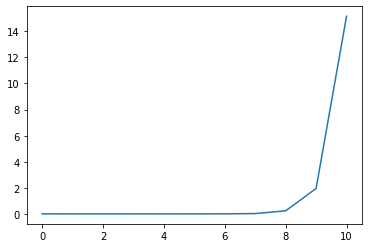

In [58]:
# ploting the CPU computation values
plt.plot(t_cpu)

In [59]:
# GPU computation speed
t_gpu=[]
for i in range (11):
   y = torch.rand(2**i,2**i)
   y = y.to(device)
   time_gpu = timeit.timeit("y@y", globals=globals(), number=1000)
   time_gpu=round(time_gpu,5)
   t_gpu.append(time_gpu)
print(t_gpu)

[0.01519, 0.01014, 0.00976, 0.00979, 0.00942, 0.01013, 0.0114, 0.00965, 0.00972, 0.00981, 0.26083]


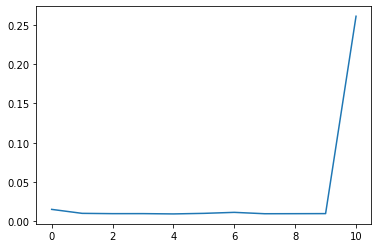

In [60]:
#plotting the GPU computaion values 
plt.plot(t_gpu)

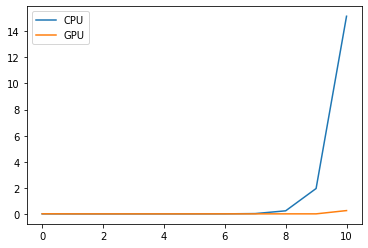

In [61]:
plt.plot(t_cpu, label='CPU')
plt.plot(t_gpu, label='GPU')
plt.legend()

In [77]:
df=pd.DataFrame({'CPU_time':t_cpu,'GPU_time':t_gpu}, columns=['CPU_time','GPU_time'], index=[1,2,3,4,5,6,7,8,9,10,11])

In [78]:
df

,CPU_time,GPU_time
1,0.00921,0.01519
2,0.00735,0.01014
3,0.00527,0.00976
4,0.00695,0.00979
5,0.00644,0.00942
6,0.00709,0.01013
7,0.01082,0.01140
8,0.03140,0.00965
9,0.24198,0.00972
10,1.95126,0.00981


By looking at the above table we can say that for matrix multiplication of upto 2^7 * 2^7  the CPU is faster 

**Q4**. We used PyTorch to find the numeric solution to $f(x) = (x-2)^2$. Write code that will find the solution to  $f(x)= \sin(x-2)\cdot(x+2)^2+\sqrt{\cos(x)}$. What answer do you get?


In [19]:
#def f(x):
#    return torch.pow((x-2.0), 2) 

def f(x):
  return torch.add(torch.mul(torch.sin(x-2.0),torch.pow((x+2.0),2)),torch.sqrt(torch.cos(x)))

#x_axis_vals = np.linspace(-7,9,100) 
#y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

#sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x)=(x-2)^2$')

In [20]:
x_axis_vals = np.linspace(-5,9,100)

In [21]:
x_axis_vals

array([-5.        , -4.85858586, -4.71717172, -4.57575758, -4.43434343,
       -4.29292929, -4.15151515, -4.01010101, -3.86868687, -3.72727273,
       -3.58585859, -3.44444444, -3.3030303 , -3.16161616, -3.02020202,
       -2.87878788, -2.73737374, -2.5959596 , -2.45454545, -2.31313131,
       -2.17171717, -2.03030303, -1.88888889, -1.74747475, -1.60606061,
       -1.46464646, -1.32323232, -1.18181818, -1.04040404, -0.8989899 ,
       -0.75757576, -0.61616162, -0.47474747, -0.33333333, -0.19191919,
       -0.05050505,  0.09090909,  0.23232323,  0.37373737,  0.51515152,
        0.65656566,  0.7979798 ,  0.93939394,  1.08080808,  1.22222222,
        1.36363636,  1.50505051,  1.64646465,  1.78787879,  1.92929293,
        2.07070707,  2.21212121,  2.35353535,  2.49494949,  2.63636364,
        2.77777778,  2.91919192,  3.06060606,  3.2020202 ,  3.34343434,
        3.48484848,  3.62626263,  3.76767677,  3.90909091,  4.05050505,
        4.19191919,  4.33333333,  4.47474747,  4.61616162,  4.75

In [22]:
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

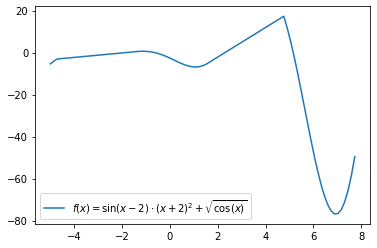

In [23]:
sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x)= \sin(x-2)\cdot(x+2)^2+\sqrt{\cos(x)}$')

In [24]:
#def fP(x): #Defining the derivative of f(x) manually
#    return torch.mul(2,(x+2.0),torch.sin(x-2)) 

#y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
#sns.lineplot(x_axis_vals, [0.0]*len(x_axis_vals), label="0", color='black')
#sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x) = (x-2)^2$')
#sns.lineplot(x_axis_vals, y_axis_vals_p, label="$f'(x)=2 x - 4$")

In [25]:
x = torch.tensor([0.5], requires_grad=True)
print(x.grad)

None


In [26]:
value = f(x)
print(value)

tensor([-5.2975], grad_fn=<AddBackward0>)


In [27]:
x = torch.tensor([-1.0], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100
epsilon = 1e-5
eta = 0.1

while torch.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that x_prev and x_cur don't point to the same object!
    
    #Compute our function, gradient, and update
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as py-torch will not do that for us
    
    #What are we currently now?
    x_cur = x.data
    
print(x_cur)

tensor([1.0635])


In [28]:
x_param = torch.nn.Parameter(torch.tensor([-1.0]), requires_grad=True)

In [29]:
optimizer = torch.optim.SGD([x_param], lr=eta)

In [30]:
for epoch in range(60):
    optimizer.zero_grad() #x.grad.zero_()
    loss_incurred  = f(x_param)
    #f(inputs, parameters)
    loss_incurred.backward()
    optimizer.step() #x.data -= eta * x.grad
print(x_param.data)

tensor([1.0635])
